<a href="https://colab.research.google.com/github/khanabdullahbelal/Data-Structure/blob/main/Boosting_Techniques_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boosting Techniques | Assignment

1. What is Boosting in Machine Learning? Explain how it improves weak
learners.

1. Boosting combines multiple weak learners sequentially Each new model is trained to focus more on the data points that were misclassified by previous models, so errors are corrected step by step.

2. It improves performance by reducing bias By giving higher importance to hard-to-predict samples and combining learners using weighted voting, weak models together form a strong learner.

Example: In AdaBoost, several decision stumps (very small decision trees) are trained one after another. Each stump focuses more on the samples misclassified by earlier stumps, and their weighted combination produces a highly accurate final model.

2. What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

1. AdaBoost trains models by changing the weights of data points, giving more importance to samples that were misclassified earlier.

2. Gradient Boosting trains models by fitting new models to the residual errors using a loss function, without re-weighting data points.

Example:
AdaBoost increases focus on wrongly classified samples, while Gradient Boosting trains the next model to predict the errors made by the previous model.


3. How does regularization help in XGBoost?

1. Regularization in XGBoost penalizes complex models by adding terms for the number of leaves and leaf weights, helping prevent overfitting.

2. It controls model complexity so trees stay simpler and generalize better to unseen data.

Example:
If an XGBoost tree grows too deep, regularization reduces its impact or stops extra splits, resulting in a simpler and more stable model.


4. Why is CatBoost considered efficient for handling categorical data?

1. CatBoost handles categorical features internally using target-based encoding, so no manual one-hot encoding is needed.

2. It uses an ordered boosting strategy that prevents target leakage and improves model stability.

Example:
For a feature like “city,” CatBoost converts categories into meaningful numerical values during training without creating many dummy variables.


5. What are some real-world applications where boosting techniques are
preferred over bagging methods?

1. Boosting is preferred when high accuracy is needed and the problem has complex patterns, because it reduces bias better than bagging.

2. It works well when data is structured and clean, allowing models to focus on hard-to-predict cases.

Example:
In credit risk assessment, boosting models like XGBoost outperform bagging methods by better identifying difficult loan default cases.


Using load_breast_cancer() for cancer classification and fetch_california_housing() for house price prediction, boosting models (e.g., Gradient Boosting) often outperform bagging by learning difficult patterns and correcting previous errors.

6. Write a Python program to:

● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train AdaBoost Classifier
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.9649122807017544


7. Write a Python program to:

● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load dataset
X, y = fetch_california_housing(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions and R-squared score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)


R-squared Score: 0.7756446042829697


8. Write a Python program to:

● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load Breast Cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost Classifier (Colab-compatible)
xgb_model = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)

# GridSearchCV to tune learning rate
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2]
}

grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy"
)

# Train model
grid.fit(X_train, y_train)

# Best model and evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("Model Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.2}
Model Accuracy: 0.956140350877193


9. Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn

In [11]:
!pip install catboost

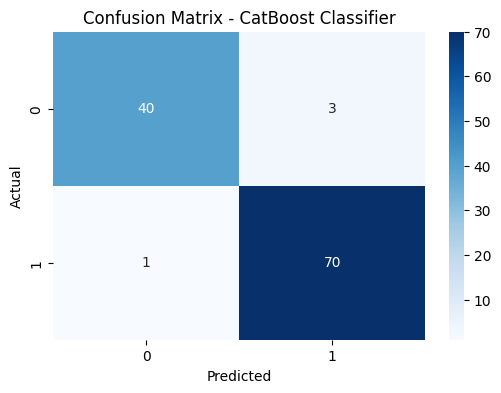

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train CatBoost Classifier
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.

The dataset is imbalanced, contains missing values, and has both numeric and categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

I would preprocess the data by imputing missing values (median for numeric, most frequent for categorical), handle imbalance using class weights, and prefer CatBoost or XGBoost since they handle mixed feature types and complex patterns well (CatBoost directly handles categorical features).

I would tune hyperparameters using GridSearchCV or RandomizedSearchCV and evaluate using ROC-AUC and Recall, because missing a defaulter is costlier than flagging a safe customer.

Example (illustrative Python pipeline + output):

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, recall_score
from xgboost import XGBClassifier

# Using breast cancer data as a proxy for loan default
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=4,
    scale_pos_weight=3,   # handles imbalance
    eval_metric="logloss",
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Recall:", recall_score(y_test, y_pred))


ROC-AUC: 0.9937169312169312
Recall: 0.9861111111111112
